<a href="https://colab.research.google.com/github/juanpablosalas/SalasJuanPablo_RECV_Entrega7/blob/main/SalasJuanPablo_RECV_Entrega7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#-- Descomprimimos el dataset
# !rm -r mnist
#!unzip "/content/drive/MyDrive/Colab Notebooks/fashion-mnist.zip"

In [57]:
from glob import glob
import numpy as np
from PIL import Image
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

train_files = glob('./fashion-mnist/train/*/*.png')
valid_files = glob('./fashion-mnist/valid/*/*.png')
test_files = glob('./fashion-mnist/test/*/*.png')

train_files[0]

'./fashion-mnist/train/8/27542.png'

In [58]:
np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

len(train_files), len(valid_files), len(test_files)

(55000, 10000, 5000)

In [59]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))

N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )

N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

In [60]:
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([55000, 28, 28])

In [61]:
batch_size = 32

train_ds = torch.utils.data.TensorDataset(X_train, Y_train)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [100]:
model = torch.nn.Sequential(
  torch.nn.Conv2d(1, 16, kernel_size=4, stride=2, padding=1),
  # ( (28-4+2*1)/2 ) + 1 = 14   -> 14*14*16

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 14/2 = 7                 -> 7*7*16

  torch.nn.Dropout(p=0.15),

  torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
  # ( (13-5+2*2)/1 ) + 1 = 7   -> 7*7*32

  torch.nn.ReLU(),

   torch.nn.Conv2d(32, 32, kernel_size=4, stride=1, padding=1),
  # ( (13-4+2*1)/1 ) + 1 = 12   -> 12*12*32

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 12/2=6             -> 6*6*32

  torch.nn.Dropout(p=0.1), 

  torch.nn.ReLU(),

  torch.nn.Flatten(),
  torch.nn.Linear(6*6*32, 10)
)
model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.15, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): ReLU()
  (6): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Dropout(p=0.1, inplace=False)
  (10): ReLU()
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=1152, out_features=10, bias=True)
)

In [126]:
model = torch.nn.Sequential(
  torch.nn.Conv2d(1, 16, kernel_size=4, stride=2, padding=1),
  # ( (28-4+2*1)/2 ) + 1 = 14   -> 14*14*16

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 15/2 = 7             -> 7*7*16

  torch.nn.Dropout(p=0.15),

  torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
  # ( (7-5+2*2)/1 ) + 1 = 7   -> 7*7*32

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 7/2 = 3                 -> 3*3*32

  torch.nn.Dropout(p=0.1), 

  torch.nn.ReLU(),

  torch.nn.Flatten(),
  torch.nn.Linear(3*3*32, 10)
)
model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.15, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.1, inplace=False)
  (8): ReLU()
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=288, out_features=10, bias=True)
)

In [127]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.1)

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_helper.py:715: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to training  mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


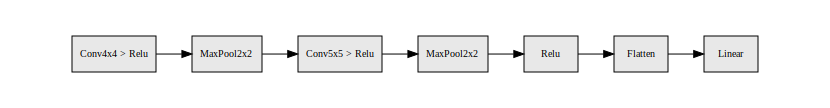

In [128]:
import hiddenlayer as hl

hl.build_graph(model, torch.zeros([32,1,28,28]))

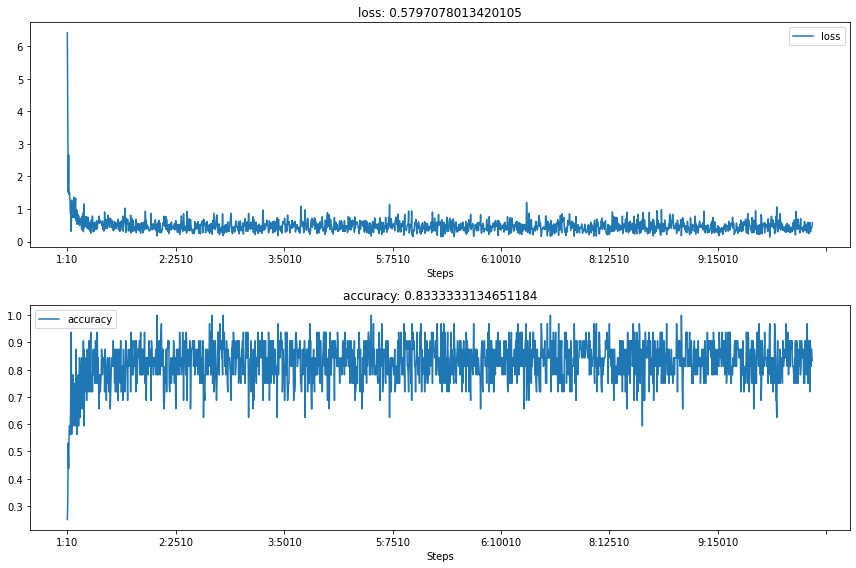

In [129]:
from sklearn.metrics import f1_score

n_epoch = 10

history = hl.History()
canvas = hl.Canvas()

iter = 0

for epoch in range(n_epoch):
  for batch_id, (X_train_batch, Y_train_batch) in enumerate(train_dl):
    model.train()
    Xtr = X_train_batch.unsqueeze(1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train_batch)

    Y_pred = torch.argmax(Y_pred, 1)
    f1 = f1_score(Y_train_batch, Y_pred, average='macro')    

    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    iter += 1

    if iter%10 == 0:
        #-- Visualizamos la evolución de los score loss y accuracy
        history.log((epoch+1, iter), loss=loss, accuracy=acc)
        with canvas:
          canvas.draw_plot(history["loss"])
          canvas.draw_plot(history["accuracy"])

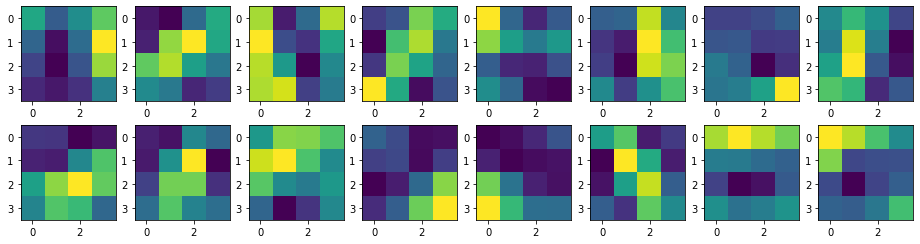

In [130]:
kernels = list(model.children())[0].weight.detach()

fig = plt.figure(figsize=(16,4))
k = 0
for i in range(kernels.size(0)):
    plt.subplot(2,8,k+1)
    plt.imshow(kernels[i].squeeze())
    k += 1
plt.show()

In [153]:
model.eval()
Xvl = X_test.unsqueeze(1)
Y_pred = model(Xvl)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:0.37, F1:0.86, Acc:0.87


La red neuronal convolucional (CNN) diseñada en este código cuenta. Con dos capas. El número de características de la primera capa es 14x14x16=3,136.  Después de esto pasa por un rectificador y luego por un maximum pool (MaxPool) que varía el número de características a 7x7x16. La segunda capa tiene como entrada 16 canales y como salida 32. Su número de características es 7x7x32=1,568 y pasa de nuevo por un rectificador y un maximum pool que dejan el número total de características en 288. Después de cada capa se tiene un dropout relativamente pequeño (el primero del 15% y el segundo de 10%). Esta CNN produce un f1 score de 0.86, una pérdida de 0.37 y una accuracy de 0.87 al ser probada con el set de testeo.